In [2]:
import random
import matplotlib.pyplot as plt
from statistics import stdev, pstdev, mean
%matplotlib inline


In [3]:
def flip_a_coin():
    coin = [0,1]
    return random.choice(coin)

In [4]:
def simulate_coin_flip(num_flips=16):
    heads = 0
    tails = 0 

    intervals = {}
    # append the interval stops to the list of intervals
    for i in range(num_flips):
        intervals[2**i] = (0, 0)
    
    total_flips = 2**num_flips
    
    for flip in range(total_flips): 
        if flip_a_coin() == 1:
            heads += 1
        else:
            tails += 1
        
        # if this is one of the intervals to record - record now
        if flip in intervals:
            intervals[flip] = (heads, tails)
    
    return intervals


In [5]:
flips_dictionary = simulate_coin_flip()
head_list = []
tail_list = []
for key, value in flips_dictionary.items():
    head_list.append(value[0])
    tail_list.append(value[1])

In [6]:
head_list = sorted(head_list)
tail_list = sorted(tail_list)


In [7]:
diff_list = []
ratio_list = []
for each in range(len(head_list)):
    if tail_list[each] != 0:
        diff_list.append(head_list[each] - tail_list[each])
        ratio_list.append(head_list[each] / tail_list[each])


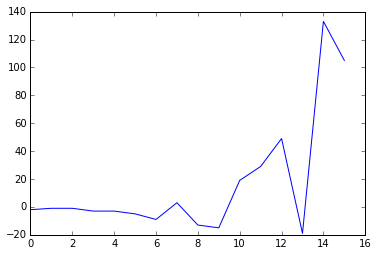

In [8]:
diff_list
plt.plot(diff_list)
plt.show()

In [9]:
# This plot shows that the difference between heads and tails is about nil until 
# 2**10 iterations.

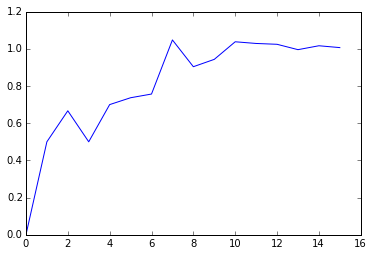

In [10]:
ratio_list
plt.plot(ratio_list)
plt.show()

In [11]:
# this plot shows that the ratio of heads to tails is varying up until about 2**10th iteration.

In [12]:
trials = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

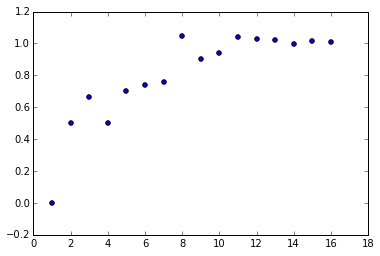

In [13]:
plt.scatter(trials, ratio_list)
plt.show()

In [14]:
# This shows that the ratio between heads and tails in MOST trials ends up around the 1.0 mark
#  of the points end up on

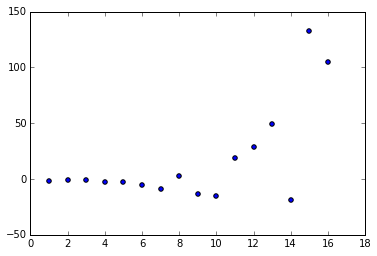

In [15]:
plt.scatter(trials, diff_list)
plt.show()

In [16]:
# this graph shows that for most trials there is very little difference the bigger the number
# if iterations in the trial produced larger variants with the data

In [17]:
twenty_trial_ratio = []
mean_ratio = []
std_ratio = []

for i in range(0,17):
    flips_dictionary = {}
    
    for j in range(0, 21):
        flips_dictionary = simulate_coin_flip(i)
    
        for key, value in flips_dictionary.items():
            if value[1] != 0:
                twenty_trial_ratio.append(value[0] / value[1])
                
    if len(twenty_trial_ratio) > 0:
        mean_ratio.append(mean(twenty_trial_ratio))
        std_ratio.append(stdev(twenty_trial_ratio))

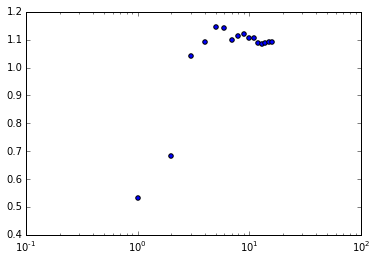

In [18]:
plt.scatter(trials, mean_ratio)
plt.xscale('log')
plt.show()

In [19]:
# this shows that for most of the trials the mean is right around 1.1 - except for 3 which 
# are varying

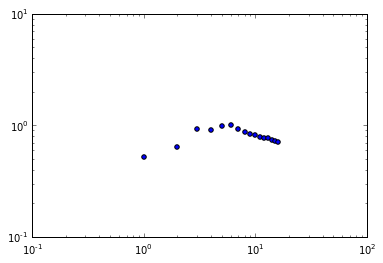

In [20]:
plt.scatter(trials, std_ratio)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [21]:
# this shows the standard deviation of 20 trials is about 0.5 for most (all but two) 
# of the trials

In [22]:
def get_coin_flip_ratio(num_flips):
    
    heads = 0
    tails = 0
    for i in range(num_flips): 
        if flip_a_coin() == 1:
            heads += 1
        else:
            tails += 1
    
    return heads/tails

In [23]:
trials_a = []
for i in range(0,100000):
    trials_a.append(get_coin_flip_ratio(100))

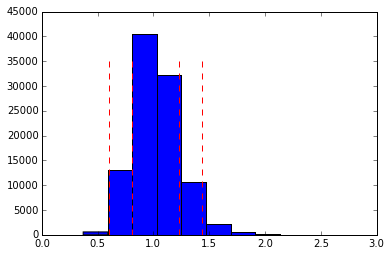

In [52]:
plt.hist(trials_a)
mean_a = mean(trials_a)
stdev_a = pstdev(trials_a)
plt.vlines(mean_a, ymin, ymax, color="blue")
plt.vlines([mean_a - 2* stdev_a, mean_a - stdev_a, mean_a + stdev_a, mean_a + 2 * stdev_a], ymin, ymax, linestyles="dashed", color="red")
plt.show()
plt.show()

In [25]:
# this histogram shows that for the 100 flips trial the mean is about 1.0 and the 
# standard deviation is about 0.25

In [26]:
trials_b = []
for i in range(0,100000):
    trials_b.append(get_coin_flip_ratio(1000))

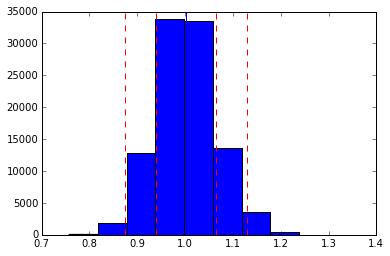

In [51]:
plt.hist(trials_b)
ymin, ymax = plt.ylim()
mean_b = mean(trials_b)
stdev_b = pstdev(trials_b)
plt.vlines(mean_b, ymin, ymax, color="blue")
plt.vlines([mean_b - 2* stdev_b, mean_b - stdev_b, mean_b + stdev_b, mean_b + 2 * stdev_b], ymin, ymax, linestyles="dashed", color="red")
plt.show()

In [28]:
# this histogram shows that for the 1000 flips trial the mean is about 1.0 and the 
# standard deviation is about 0.05

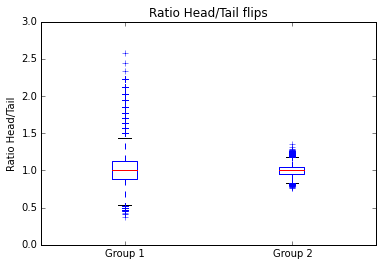

In [49]:
plt.boxplot([trials_a, trials_b])
ymin, ymax = plt.ylim()
plt.ylim(ymin, ymax)
plt.title("Ratio Head/Tail flips")
plt.ylabel("Ratio Head/Tail")
plt.xticks((1,2),["Group 1", "Group 2"])
plt.show()

#plt.boxplot([group1, group2, group3])
#ymin, ymax = plt.ylim()
#plt.ylim(ymin-30, ymax+30)
#plt.title("Running times")
#plt.ylabel("Seconds")
#plt.xticks(range(1,4), ["Group 1", "Group 2", "Group 3"])
#plt.show()